
### Granger Causality

**Conceptual understanding**
- Conceptual Understanding of Granger Causality

**Granger vs Real Causality**
- Granger vs. Real Causality
- Granger Causality vs. Structural Causal Models
- What Does Granger Really Mean by “Causality”?
- Why Time Precedence ≠ True Cause

**Mathematical background**
- The Mathematical Formulation

<!-- **Testing**
- Testing Procedure (F-test, p-values) -->

<!-- **Interpretation**
- Interpreting Results (p-values, direction) -->

**Lags**
- Choosing the Right Lag

**Model Assumptions**

**Considerations**
- When Granger Is Useful Despite Its Limits
- Where It Helps and Where It Doesn't
- When to Use Granger Causality
- Caveats (stationarity, omitted variables, etc.)

---

### Implementation
- Python Implementation / Running the Granger Causality Test
- Testing with VAR & Granger in Python

---

### Intuitive Example and Hands on example
- An Intuitive Example (e.g., Rain & Umbrella Sales)
- Example with Real Data (e.g., economic indicators)
- Financial Example: Does Interest Rate Predict Inflation?
- Examples That Mislead (e.g., Confounding, Feedback Loops)

---

### Going further
- Extensions: Nonlinear Granger, Conditional Granger
- Bonus: Applying to a Multivariate VAR Model




## Granger Causality (Definition)

### Conceptual Understanding of Granger Causality

[kind_of_OK] Granger causality is a statistical concept used to determine whether one time series can provide predictive information about another.

It is not concerned with true causality in the philosophical sense, but rather with forecasting power.

[kind_of_OK] At its core, Granger causality tests whether past values of one variable (X) help improve the prediction of the current value of another variable (Y), beyond what can be predicted using past values of Y alone.

[kind_of_OK] Formally, if including lagged values of X in a regression model of Y significantly improves the model’s accuracy, then X is said to Granger-cause Y.

The method involves estimating two models:

1. Restricted model: Y is regressed only on its own past values.
2. Unrestricted model: Y is regressed on its own past values and past values of X.

An F-test (or similar) is used to compare the models. If the unrestricted model performs significantly better, it suggests that X provides predictive information for Y — meaning X Granger-causes Y.

In short, Granger causality asks:

> *“Does knowing the past of X help forecast Y better than just using the past of Y?”*

If yes, then it is said that X Granger-causes Y.




### Granger vs. Real Causality

Despite having the word causality in its name, it’s important to note that Granger causality implies predictive precedence, not true causality.

Granger causality is based on time series regression and temporal precedence. This “causality” is directional and predictive, not necessarily explanatory. Granger causality assumes that causes precede effects, but it does not prove that X is the root cause of changes in Y — it simply shows that X contains useful information for predicting Y.

Real (or structural) causality implies a mechanism or process by which one variable directly influences another. Real causality is often grounded in domain knowledge or experimental intervention.

Structural Causal Models (SCMs), like those formalized by Judea Pearl, define causality through directed acyclic graphs (DAGs) and intervention-based reasoning (e.g., do-calculus). SCMs are built to answer counterfactual questions (e.g., "What would happen to Y if we forced X to change?").

Key difference:

* Granger causality is based on statistical patterns in time-ordered data.
* Real causality involves underlying mechanisms, often requiring control of confounding variables or intervention.


<!-- #### ⚖️ Granger Causality vs. Structural Causal Models (SCMs) -->


Comparison:

| Feature                     | Granger Causality | Structural Causal Models                 |
| --------------------------- | ----------------- | ---------------------------------------- |
| Type of causality           | Predictive        | Mechanistic / Interventional             |
| Requires time ordering      | Yes               | Not necessarily                          |
| Handles confounding         | No (limited)      | Yes (explicitly)                         |
| Answers "what if" questions | No                | Yes (via interventions)                  |
| Based on regression         | Yes               | No (based on graph theory/logical rules) |



### Mathematical Background/Formulation

#### The Mathematical Formulation of Granger Causality

Granger causality is tested using a vector autoregressive (VAR) framework, where the goal is to determine whether past values of one time series (X) help predict another series (Y).

##### Step 1: Define Two Models

Suppose we have two stationary time series: $X_t$ and $Y_t$.
We estimate two linear models for $Y_t$, using the same number of lags $p$.

First, we estimate a restricted model that uses only the past values of $Y$ to predict itself:

$$
Y_t = \alpha_0 + \sum_{i=1}^p \alpha_i Y_{t-i} + \epsilon_t
$$

Then we estimate the unrestricted Model (Y and X), which also adds lagged values of $X$ as predictors:

$$
Y_t = \beta_0 + \sum_{i=1}^p \beta_i Y_{t-i} + \sum_{i=1}^p \gamma_i X_{t-i} + u_t
$$


##### Step 2: Hypothesis Test

The key test is whether the coefficients on lagged $X$'s ($\gamma_i$) are jointly zero:

* Null hypothesis $H_0$: $\gamma_1 = \gamma_2 = \cdots = \gamma_p = 0$
  (X does not Granger-cause Y)

* Alternative hypothesis $H_1$: At least one $\gamma_i \ne 0$
  (X Granger-causes Y)


##### Step 3: Test Statistic

We compare the residual sum of squares (RSS) from the restricted and unrestricted models using an F-test:

$$
F = \frac{\text{Estimate of Explained Variance}}{\text{Estimate of Unexplained Variance}}
$$

or

$$
F = \frac{(RSS_r - RSS_u) / p}{RSS_u / (T - 2p - 1)}
$$

Where:

* $RSS_r$ = Residual sum of squares from restricted model
* $RSS_u$ = Residual sum of squares from unrestricted model
* $T$ = Total number of observations
* $p$ = Total number of lags tested

This tests whether the reduction in residual error from adding X's lags is statistically significant.



If the F-statistic is significant (p-value < chosen alpha level), we reject $H_0$ and conclude that X Granger-causes Y.

##### 4. Interpret the test

After performing a Granger causality test, the main outputs are:

* p-values (from F-tests or Wald tests)
* Causal direction(s) (based on model configuration)

###### 4.1. Understanding the p-value

Using the F-distribution with:

- Numerator df = $p$
- Denominator df = $T - 2p - 1$

The p-value tells us the probability of observing the improvement in fit by chance, under $H_0$.

[alt] The p-value tells you the probability that the observed improvement in forecasting is due to chance, assuming the null hypothesis is true.

- If $p\text{-value} < \alpha$: Reject $H_0$, meaning that X Granger-causes Y
- Otherwise, fail to reject $H_0$, meaning no statistical evidence that X Granger-causes Y


###### 4.2. Understanding directionality

<!-- Note that the test must be repeated in both directions: test if X Granger-causes Y, and if Y Granger-causes X. -->

Granger causality is not symmetric. You should always test:

* Does X Granger-cause Y?
* Does Y Granger-cause X?

You may find:

* Unidirectional causality: Only one variable helps predict the other.
* Bidirectional causality: Both variables help predict each other.
* No causality: Neither improves prediction of the other.




To refactor later:
- What about Wald test?

<!-- This is the calculated F-statistic. It measures the extent to which the unrestricted model (including lagged X values) reduces the sum of squared residuals (errors) compared to the restricted model (excluding lagged X values). A higher F-statistic suggests that X's lags are important. -->


<!-- - Lag Selection and Model Assumptions -->
## Choosing the Right Lag

Here is an objective and well-structured explanation for the section:


### Lag Selection

Proper lag selection and awareness of model assumptions are critical to valid Granger causality testing. Incorrect lags or violated assumptions can lead to misleading conclusions — either false positives or missed causal signals.


#### 1. Lag Selection: How Many Past Values to Include?

The number of lags (p) refers to how many previous time steps of each variable are used in the model. Choosing the right lag is essential for:

* Capturing meaningful temporal dependencies
* Avoiding overfitting or underfitting

##### Common Approaches:

Use information criteria to determine the optimal lag:

* AIC (Akaike Information Criterion)
* BIC (Bayesian Information Criterion)
* HQIC (Hannan–Quinn Criterion)

These metrics balance model fit and complexity — lower values suggest better lag choices.

##### Practical Tip:

Use automated lag selection tools (e.g., `statsmodels.tsa.stattools.select_order`) or test multiple lags and check robustness of results.


### Model Assumptions

Granger causality assumes some underlying assumptions regarding the data, models and its interpretation. If these assumptions are not met or ignored, it might generate unreliable results, or incorrect conclusions and misuse in practical analysis. These assumptions are:

##### a. Stationarity

Granger causality assumes that the time series is stationary. If it isn't, the data should be processed in order to be so. If the test is used with non-stationary data, it can yield spurious results, where variables appear related simply because of shared trends.

##### b. Linearity

The traditional Granger test is based on linear models. It may fail to detect relationships in nonlinear systems. Nonlinear extensions (using kernel-based or neural Granger causality) exist but are more complex.

##### c. No Omitted Confounders

Like any regression-based approach, Granger causality assumes that all relevant variables are included. If an unobserved variable influences both X and Y (a hidden confounder), the test may detect spurious causality.

##### d. White Noise Residuals

Residuals (errors) from the VAR models should be uncorrelated (white noise). This ensures the model captures the relevant dynamics. You can use a Ljung–Box test or autocorrelation plots to assess residuals.

#### e. Correct use of Lag Choice

If too few lags are used, the test might miss important temporal dependencies. If
too many lags are used, the test power is decreased, while increasing the risk of overfitting.

#### f. Only applies to past observations

Granger tests whether past values of X help predict Y, so it assumes that causes come before effects. It cannot detect simultaneous causality or feedback systems operating in the same time step.


## Where It Helps and Where It Doesn't
## When to Use Granger Causality (and when not to)

Granger causality is a valuable statistical tool for exploring predictive relationships between time series. However, it must be used with clear understanding of its assumptions and limitations. This section outlines when Granger causality is useful, where it falls short, and the critical caveats to keep in mind.

### Where Granger Causality Helps – and Where It Doesn’t

Granger causality is most effective when your goal is to:

#### It Helps When:

* Identify predictive relationships: Determine if one variable can help forecast another.
* Pre-screen features for time series forecasting models.
* Explore temporal structure in multivariate time series data.
* You're interested in temporal precedence: which variable tends to change first.
* You need a quick diagnostic to test lead-lag relationships.
* You want to check directionality of influence in time-lagged data.
* Use it as a statistical lens to evaluate temporal dependencies.

Even though it doesn't establish *true* causality, it is a useful exploratory tool to guide model development and hypothesis testing.

#### It Doesn’t Help When:

* You're seeking mechanistic, structural explanations or real-world causation.
* The variables are non-stationary with no transformation.
* There are unobserved confounders or instantaneous feedback loops.
* The underlying relationship is nonlinear, and you're using a linear model.
* There's too much volatility in the data, possibly leading to unstable Granger relationships due to noise or overfitting.
* You want to measure the strength of the effect, and not just its presence.
* You want to prove the absence of predictive power. A non-significant result may occur due to wrong lag selection, insufficient data or hidden nonlinearity. Just because you can't prove the presence of predictive power, doesn't mean you can disprove it.






<!-- ### 🕒 Why Time Precedence ≠ True Cause

Just because one event occurs before another does not mean it causes it. This is the core limitation of inferring causality from time order alone.

Granger causality relies on the assumption that causes come before effects, but it doesn’t account for:

* Confounding variables that affect both X and Y.
* Spurious correlations due to shared trends or seasonality.
* Feedback loops, where Y may also influence X.

Thus, while time precedence is a necessary condition for causality, it is not sufficient to prove it. Without controlling for external factors or understanding the system’s structure, temporal correlation can be misleading. -->


### Python Implementation

In Python, we can apply Granger Causality using the statsmodels package [x], as show below:


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

results_dict = grangercausalitytests(x, maxlag, addconst=True, verbose=None)


The function returns a dict, with a lot of things inside. Let's unpack it.

First, the length and keys of the dictionary corresponds to how many lags were used. So, to analyze results for lag=4, we would inspect results_dict[4].

Inside the dictionary is a tuple of length 2 with the results of four different statistical tests for Granger causality:

```python
{
    lag1: (
        {
            'ssr_ftest': (F_statistic, p_value_F, df_denom, df_num),
            'ssr_chi2test': (chi2_statistic, p_value_chi2, df_num),
            'lrtest': (chi2_statistic_lr, p_value_lr, df_num),
            'params_ftest': (F_statistic_params, p_value_params, df_denom_params, df_num_params)
        },
        [array_of_OLS_results_unrestricted, array_of_OLS_results_restricted, array_of_significant_lag_coeffs]
    ),
    lag2: (...),
    ...
}
```

Let's break down the components for each lag:

### Test Statistics Dictionary

The first part is a dictionary containing the results of four different statistical tests. The core idea behind these tests is to compare the restricted model with the unrestricted model

1.  `ssr_ftest` (F-test based on Sum of Squared Residuals):
    * `F_statistic`: Calculated F-statistic described earlier.
    * `p_value_F`: Probability score from the same test.
    * `df_denom`: Degrees of freedom for the denominator of the F-statistic.
    <!-- This is typically `n - k_unrestricted`, where `n` is the number of observations and `k_unrestricted` is the number of parameters in the unrestricted model. -->
    * `df_num`: Degrees of freedom for the numerator of the F-statistic.
     <!-- This is equal to the number of lags of X included in the unrestricted model (which is the `lag` value itself). -->

2.  `ssr_chi2test` (Chi-squared test based on Sum of Squared Residuals):
    * `chi2_statistic`: This is an asymptotic (large sample) version of the F-test. It's calculated as `df_num * F_statistic`.
    * `p_value_chi2`: The p-value for the Chi-squared statistic. Similar to the F-test p-value, a small value suggests Granger causality.
    * `df_num`: Degrees of freedom, which is the number of lags of X.

3.  `lrtest` (Likelihood Ratio Test):
    * `chi2_statistic_lr`: This test compares the likelihood functions of the restricted and unrestricted models. A larger value indicates the unrestricted model fits the data significantly better.
    * `p_value_lr`: The p-value for the likelihood ratio test statistic. Again, a small p-value suggests X Granger-causes Y.
    * `df_num`: Degrees of freedom, equal to the number of lags of X.

4.  `params_ftest` (F-test on a Ljung-Box type test for significance of coefficients):
    * `F_statistic_params`: This F-statistic specifically tests the joint significance of the coefficients of the lagged X variables in the unrestricted model.
    * `p_value_params`: The p-value for this F-statistic. A small p-value indicates that the coefficients for the lagged X values are jointly significantly different from zero, supporting Granger causality.
    * `df_denom_params`: Denominator degrees of freedom.
    * `df_num_params`: Numerator degrees of freedom (number of lags of X).

### OLS Results and Significant Lag Coefficients (Second element of the tuple)

This part is a list containing:

1.  `array_of_OLS_results_unrestricted`: An array containing the results object from the Ordinary Least Squares (OLS) regression for the *unrestricted* model (i.e., `Y_t = c + a1*Y_{t-1} + ... + ap*Y_{t-p} + b1*X_{t-1} + ... + bq*X_{t-q} + e_t`). This object itself contains detailed information about the regression, like coefficients, standard errors, t-statistics, etc.
2.  `array_of_OLS_results_restricted`: An array containing the results object from the OLS regression for the *restricted* model (i.e., `Y_t = c + a1*Y_{t-1} + ... + ap*Y_{t-p} + u_t`).
3.  `array_of_significant_lag_coeffs`: This is an array of regression coefficients from the unrestricted model that are statistically significant at a pre-defined level (usually 5%). This helps identify which specific lags of X are driving the Granger causality.

In summary:

`grangercausalitytests` gives you a dictionary where each entry (for a specific number of lags) provides:

* Four statistical tests (F-test, Chi-squared test on SSR, Likelihood Ratio test, and F-test on parameters) each with its test statistic, p-value, and degrees of freedom. The p-values are crucial: small p-values (e.g., < 0.05) indicate evidence *against* the null hypothesis (no Granger causality) and thus suggest that the first time series *does* Granger-cause the second time series for that number of lags.
* The underlying OLS regression results for both the model including the potentially causal variable and the model excluding it.

When interpreting the results, you'd typically look at the p-values across the different tests for a chosen number of lags. Consistent small p-values strengthen the conclusion of Granger causality. The choice of the number of lags is important and can be guided by information criteria (like AIC or BIC) or domain knowledge.

### Hands-on examples


### Intuitive Example and Hands on example
- An Intuitive Example (e.g., Rain & Umbrella Sales)
- Example with Real Data (e.g., economic indicators)
- Financial Example: Does Interest Rate Predict Inflation?
- Examples That Mislead (e.g., Confounding, Feedback Loops)




### Going further
- Extensions: Nonlinear Granger, Conditional Granger
- Bonus: Applying to a Multivariate VAR Model

C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_21604\2917423435.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').dropna()
C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_21604\2917423435.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()



Granger Causality Test Results:


c:\Users\douglas.sgrott_indic\miniconda3\envs\tsfresh_venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


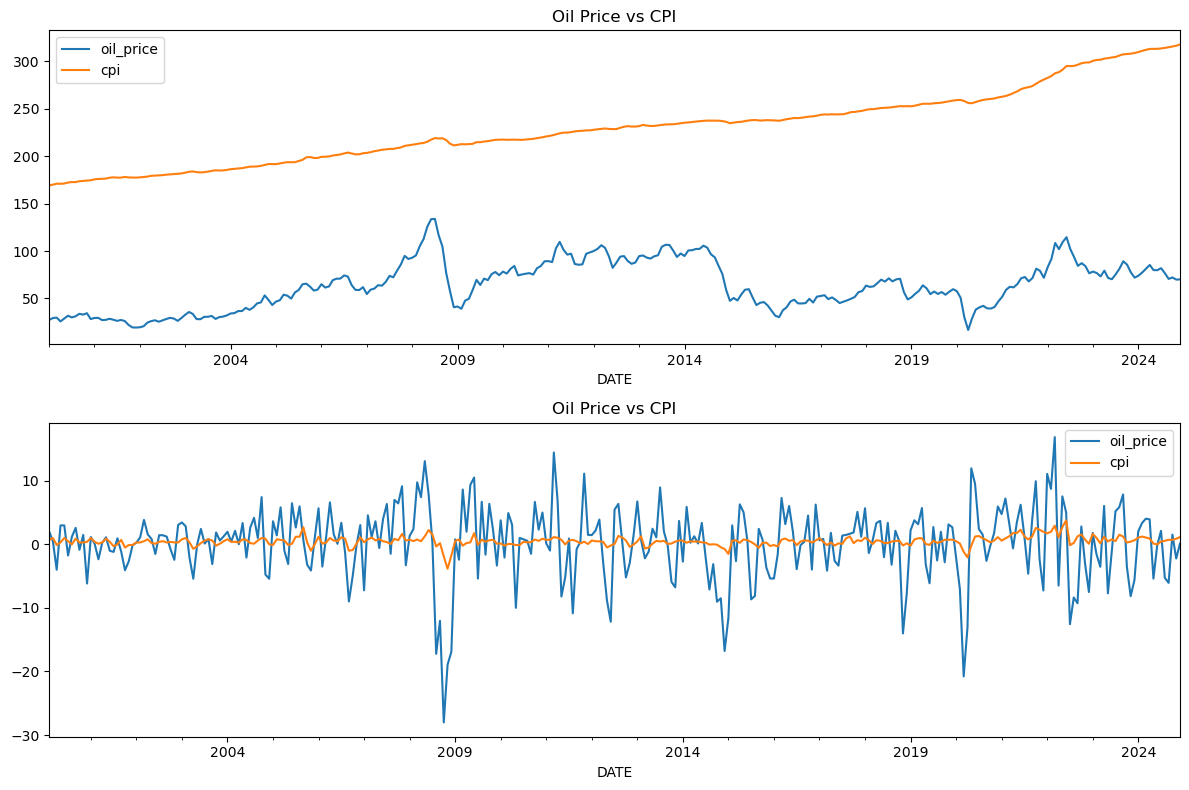

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from statsmodels.tsa.stattools import grangercausalitytests

# Set start and end dates
start_date = '2000-01-01'
end_date = '2024-12-31'

# Download from FRED
oil = pdr.DataReader('DCOILWTICO', 'fred', start_date, end_date)
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# Merge datasets
df = pd.concat([oil, cpi], axis=1)
df.columns = ['oil_price', 'cpi']

# Handle missing values (e.g. oil markets closed on weekends)
df = df.fillna(method='ffill').dropna()

# Resample to monthly (optional, since CPI is monthly)
df = df.resample('M').mean()

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
df.plot(title='Oil Price vs CPI', ax=axes[0])
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

# Prepare for Granger causality test
# The test assumes stationary data, so you may want to difference
df_diff = df.diff().dropna()
df_diff.plot(title='Oil Price vs CPI', ax=axes[1])

plt.tight_layout()


# Run Granger causality test
max_lag = 12  # up to 12 months
print("\nGranger Causality Test Results:")
test_result = grangercausalitytests(df_diff[['cpi', 'oil_price']], maxlag=max_lag, verbose=False)



ADF Test for oil_price:
  Test Statistic: -2.9905
  p-value: 0.0358
  Stationary

ADF Test for cpi:
  Test Statistic: 1.1914
  p-value: 0.9959
  Non-stationary
  ➜ Differenced 'cpi'


➡️  Granger Causality Test: Does Oil Price cause CPI?

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=5.0279  , p=0.0000  , df_denom=262, df_num=12
ssr based chi2 test:   chi2=66.0923 , p=0.0000  , df=12
likelihood ratio test: chi2=59.4800 , p=0.0000  , df=12
parameter F test:         F=5.0279  , p=0.0000  , df_denom=262, df_num=12


➡️  Granger Causality Test: Does CPI cause Oil Price?

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.1099  , p=0.3521  , df_denom=262, df_num=12
ssr based chi2 test:   chi2=14.5892 , p=0.2647  , df=12
likelihood ratio test: chi2=14.2305 , p=0.2862  , df=12
parameter F test:         F=1.1099  , p=0.3521  , df_denom=262, df_num=12


C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_21604\955971725.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').dropna()
C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_21604\955971725.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()
c:\Users\douglas.sgrott_indic\miniconda3\envs\tsfresh_venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\douglas.sgrott_indic\miniconda3\envs\tsfresh_venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


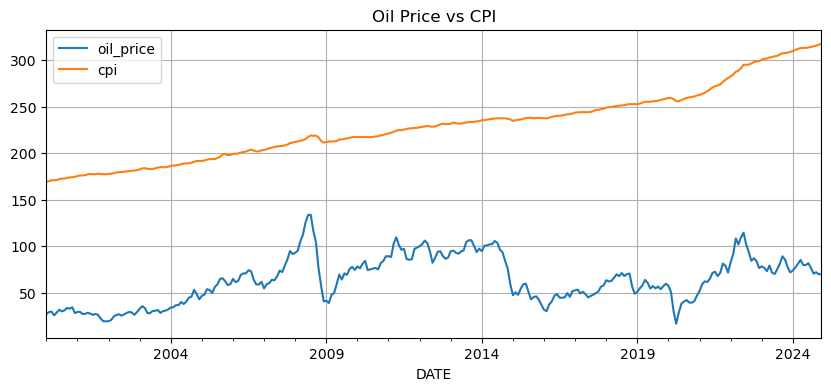

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# === Helper: ADF Test ===
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print("  Stationary" if result[1] < 0.05 else "  Non-stationary")
    return result[1] < 0.05

# === Helper: Difference if Needed ===
def make_stationary(df):
    stationary_df = df.copy()
    for col in df.columns:
        if not check_stationarity(df[col], col):
            stationary_df[col] = df[col].diff()
            print(f"  ➜ Differenced '{col}'")
    return stationary_df.dropna()

# === Download Data ===
start_date = '2000-01-01'
end_date = '2024-12-31'

oil = pdr.DataReader('DCOILWTICO', 'fred', start_date, end_date)
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)

df = pd.concat([oil, cpi], axis=1)
df.columns = ['oil_price', 'cpi']
df = df.fillna(method='ffill').dropna()
df = df.resample('M').mean()

# === Plot ===
df.plot(title='Oil Price vs CPI', figsize=(10, 4), grid=True)

# === Make Stationary ===
df_stationary = make_stationary(df)

# === Granger Causality Tests ===
max_lag = 12
print("\n\n➡️  Granger Causality Test: Does Oil Price cause CPI?")
test_result1 = grangercausalitytests(df_stationary[['cpi', 'oil_price']], maxlag=[max_lag], verbose=True)

print("\n\n➡️  Granger Causality Test: Does CPI cause Oil Price?")
test_result2 = grangercausalitytests(df_stationary[['oil_price', 'cpi']], maxlag=[max_lag], verbose=True)


In [20]:
test_result1[12][0]

{'ssr_ftest': (5.027928918416598, 1.5906989062050103e-07, 262.0, 12),
 'ssr_chi2test': (66.09231753827011, 1.7114277173082231e-09, 12),
 'lrtest': (59.4799836393579, 2.807456856846607e-08, 12),
 'params_ftest': (5.0279289184166425, 1.5906989062046993e-07, 262.0, 12.0)}

In [23]:
test_result1[12][1]

 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

<br><br><br><br><br><br><br>

# GPT

## Note: If the series are cointegrated...

- If your series are non-stationary but cointegrated, use a Vector Error Correction Model (VECM) instead of plain Granger causality.
- Cointegration implies a long-term equilibrium relationship — differencing would throw this information away.








3. (Optional but ideal): Use VAR model diagnostics to verify that the residuals are white noise (no autocorrelation), which ensures the model is valid for Granger causality inference.

